# Name: Krupesh Parmar
# ID: 202101160

# Dataset: [Crime In Baltimore](https://www.kaggle.com/datasets/sohier/crime-in-baltimore)

## About Dataset
This dataset provides information about the crimes commited in Baltimore city. This dataset is accessible from the link provided above. The dataset covers crimes commited in the city between the years 2016-2020.

This project consists of 6 parts:
1. Introduction
2. Data Cleaning
3. Data visualization
4. Data Preprocessing
5. Modeling
6. Conclusion

# 1. Introduction

This data consists of total 15 columns and 2,76,529 observations.

## Attribute description:
* **CrimeDate:** Date of committed crime
* **CrimeTime:** Time of Committed crime
* **CrimeCode:** A unique code assigned to crime based of crime type and weapon used
* **Location:** Location of commited crime
* **Inside/Outside:** Flag shows whether crime was commited inside the house or not
* **Weapon:** Description of weapon used in crime
* **Post:** Code of nearby police station
* **District:** District of location of committed crime
* **Neighbourhood:** Neighborhood of place of incident
* **Longitude:** longitude of location of committed crime
* **Latitude:** latitude of location of committed crime
* **Location 1:** tuple of consisting longitude and latitude
* **Premise:** Premise
* **Total incidents:** No. of incident in a crime


## **Let's look at the dataset**

In [ ]:
# import required libraries
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/My Drive/Data Mining/Project/Assignment - 01/BPD_Part_1_Victim_Based_Crime_Data.csv")
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


In [ ]:
df.shape

(276529, 15)

In [ ]:
columns = df.columns.tolist()
columns

['CrimeDate',
 'CrimeTime',
 'CrimeCode',
 'Location',
 'Description',
 'Inside/Outside',
 'Weapon',
 'Post',
 'District',
 'Neighborhood',
 'Longitude',
 'Latitude',
 'Location 1',
 'Premise',
 'Total Incidents']

In [ ]:
df.isna().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             2207
Description             0
Inside/Outside      10279
Weapon             180952
Post                  224
District               80
Neighborhood         2740
Longitude            2204
Latitude             2204
Location 1           2204
Premise             10757
Total Incidents         0
dtype: int64

# 2. Data Cleaning

As it is visible that, there are 1,80,952 cells are null in the weapons column. Which is around 65% rows of the whole data.
Dropping this rows can lead to loss of much significant data, which can reduce the quality of the dataset.

To deal with this null values, we can look at some other attributes, which can be related to this attribute. Like, Crime type can help to determine which type of weapon is used in a perticular crime.

In [ ]:
# Find the list of crime types in which there are null entries in the weapon column
crime_with_no_weapon = set()
for idx in df.index:
    if pd.isna(df['Weapon'][idx]):
        crime_with_no_weapon.add(df['Description'][idx])
crime_with_no_weapon

{'ARSON',
 'ASSAULT BY THREAT',
 'AUTO THEFT',
 'BURGLARY',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET'}

## Crime type details:

* **Arson:** the criminal act of deliberately setting fire to property.
* **Assault by threat:** a threat or attempt to inflict offensive physical contact or bodily harm on a person that puts the person in immediate danger of or in apprehension
* **Auto theft:** the criminal act of stealing or attempting to steal a motor vehicle
* **Burglary:** llegal entry of a building with intent to commit a crime, especially theft.
* **Larceny:** theft of personal property
* **Rape:** to force someone to have sex when they are unwilling, using violence or threatening behaviour
* **Robbery:** the action of taking property unlawfully from a person or place by force or threat of force

As it visible that where weapon values are not available, the associated crime types are mostly robbery, theft, arson, larceny, etc. In these types of crime most of the time there are not any weapon involved in crime.

So, the blank cells in weapon cells doesn't indicate that the data is missing, but we can conclude that there could no weapons involved in the crime at the first place.

So, we can fill all this blank cells with the "No weapon" value.

In [ ]:
# fill blank cells in weapon column with "No weapon" value
df['Weapon'].fillna("NO WEAPON", inplace = True)

In [ ]:
df['Total Incidents'].value_counts()

1    276529
Name: Total Incidents, dtype: int64

In the 'Total Incident' columns all the entries are filled with value 1. Which does not provide any value to the dataset. So, there is no loss in dataset quality in dropping this columns.

After this, the 'Location 1' columns contains the tuple of (Longitude, Latitude) as values. There are also separate columns for Longitude and Latitude as well. So, dropping the Location 1 column also does not affect the dataset quality.

In [ ]:
# dropping Total Incident and Location 1 columns
df.drop(['Total Incidents', 'Location 1'], axis=1, inplace=True)
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,ROW/TOWNHO
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NO WEAPON,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,STREET
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,Street
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,ROW/TOWNHO
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,STREET


In [ ]:
df['Inside/Outside'].value_counts()

I          131999
O          129782
Outside      3837
Inside        632
Name: Inside/Outside, dtype: int64

Here, 'I' indicates Inside and 'O' indicates outside. There are also few entries in which Outside is written insted of O, and Inside is written insted of I. So, we should change those values with O and I respectively to maintain data integrity.

In [ ]:
df.loc[df['Inside/Outside'] == "Outside", 'Inside/Outside'] = 'O'
df.loc[df['Inside/Outside'] == "Inside", 'Inside/Outside'] = 'I'
df['Inside/Outside'].value_counts()

O    133619
I    132631
Name: Inside/Outside, dtype: int64

In [ ]:
# After all this, if there are still some entries with null or none values drop them
df.dropna(inplace = True)

In [ ]:
df.isna().sum(), df.shape

(CrimeDate          0
 CrimeTime          0
 CrimeCode          0
 Location           0
 Description        0
 Inside/Outside     0
 Weapon             0
 Post               0
 District           0
 Neighborhood       0
 Longitude          0
 Latitude           0
 Location 1         0
 Premise            0
 Total Incidents    0
 dtype: int64,
 (89943, 15))

We would now save our cleaned data frame into cleaned.csv file

In [ ]:
df.to_csv("cleaned.csv")

# 3. Modeling

### What are we going to predict ?

Based on the following attributes we are going to predict time at which it is not safe to go out in that locality.

*   Crime Description
*   Weapon type
*   Crime category(inside/outside)
*   Crime district

### Model Type

* We are going to use RandomForest regression as regression technique.
* Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.


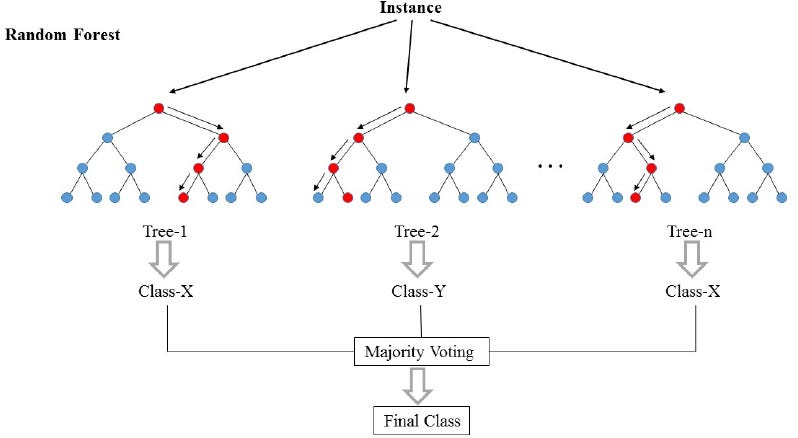

To perform modeling we need to import pre-processed dataset we got after performing pre-processing on the dataset.

In [ ]:
# importing pre-processed csv file
df_pre = df = pd.read_csv("drive/My Drive/Data Mining/Project/Assignment - 01/PreProcessed.csv")

In [ ]:
# Make dataframe for all the training features
training_features = df[["Description" , "District" , "Inside/Outside" , "Weapon"]]
training_features.head()

,Description,District,Inside/Outside,Weapon
0,4,1,2,4
1,1,7,1,5
2,6,1,2,2
3,5,7,1,4
4,1,5,2,5


In [ ]:
# import train_test_spilt to spilt the dataset for training and testing
# import GridSearchCV to find the best fitted parameters for our traing model
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Split dataset for training and tesing
X_train, X_test, y_train, y_test = train_test_split(training_features, df["CrimeTime"], random_state=42, test_size=0.20)

In [ ]:
# import StandardScaler to resize the distribution values, so that the mean of the obsereved value becomes 0 and standard deviation becomes 1.
# To normalize the data
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize X_train and X_test
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((172313, 4), (43079, 4))

In [ ]:
# import mean_squared_error, mean_absolute_error to find RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Regression model - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(random_state = 42)
parameters = {'n_estimators': list(range(5, 25, 5)), 'max_depth': list(range(1, 10, 2)), 'max_features': ['sqrt', 'log2', 'auto']}

randomForest_regressor = GridSearchCV(randomForest, parameters, n_jobs=20, verbose=0)
randomForest_regressor.fit(X_train_scaled, list(y_train))

best_model = randomForest_regressor.best_estimator_

y_train_predicted = best_model.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
train_mae = mean_absolute_error(list(y_train), y_train_predicted)

print("Training root mean sqaure error is " , train_rmse)
print("Training mean absolute error is " , train_mae)
print("Best parameters are " , randomForest_regressor.best_params_)

y_predicted = best_model.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
test_mae = mean_absolute_error(list(y_test), y_predicted)

print("Test root mean sqaure error is " , test_rmse)
print("Test mean absolute error is " , test_mae)

Training root mean sqaure error is  393.83140600394916
Training mean absolute error is  326.04072297572014
Best parameters are  {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 20}
Test root mean sqaure error is  393.3352964890662
Test mean absolute error is  324.96194026086675


#### This similar error in the training and testing data shows that the model worked well on the given dataset, and hasn't overfitted.